<a href="https://colab.research.google.com/github/MFRoz1/CA_KPrototypes_for_Amazon_Customer_Behavior_Classification/blob/main/Amazon_Customer_Behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DA & DS/Data dan hasil analisis/Amazon Customer Behavior Survey.csv')
data

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2023/06/12 4:02:02 PM GMT+5:30,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
598,2023/06/12 4:02:53 PM GMT+5:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,...,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
599,2023/06/12 4:03:59 PM GMT+5:30,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,...,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
600,2023/06/12 9:57:20 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,...,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy


# Exploratory Data Analysis


In [ ]:
data.describe(include = 'O')

,Timestamp,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Recommendation_Helpfulness,Service_Appreciation,Improvement_Areas
count,602,602,602,602,602,602,600,602,602,602,602,602,602,602,602,602,602,602
unique,601,4,5,29,3,4,4,2,3,5,4,5,2,5,3,3,9,18
top,2023/06/07 11:47:44 AM GMT+5:30,Female,Few times a month,Beauty and Personal Care,No,Few times a week,categories,Multiple pages,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Moderately,Yes,Sometimes,Product recommendations,Customer service responsiveness
freq,2,352,203,106,251,249,223,442,248,304,255,251,310,199,237,273,185,217


In [ ]:
data.describe()

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


Yang menjadi anomali disini adalah nilai minimal pada kolom **age** yang berusia 3 tahun. Akan dilakukan pengecekan untuk distribusi di kolom **age**

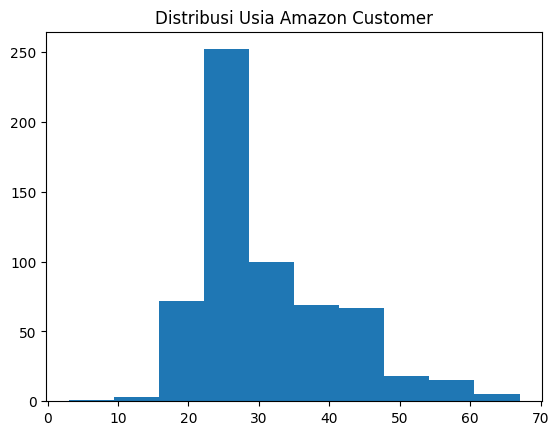

In [ ]:
# Cek Distribusi kolom Age
plt.hist(data['age'])
plt.title('Distribusi Usia Amazon Customer')
plt.show()

Banyak customer di Amazon yang berusia antara 20-30 tahun

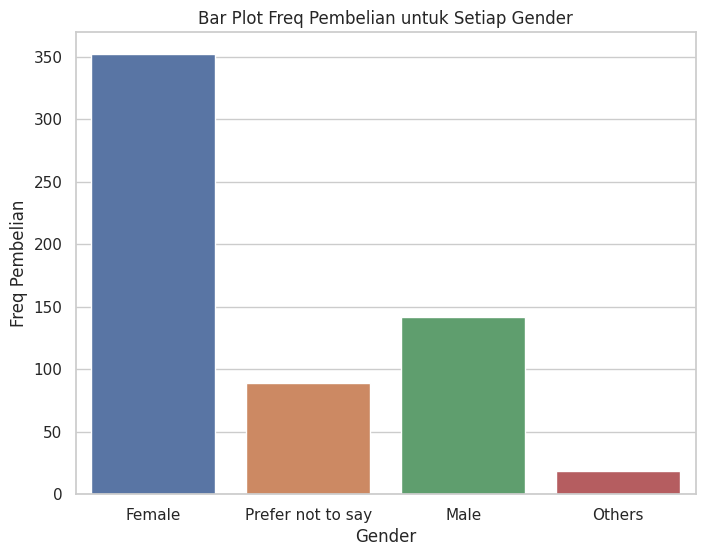

In [ ]:
# Cek gender dan frekuensi pembelian
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data)
plt.xlabel('Gender')
plt.ylabel('Freq Pembelian')
plt.title('Bar Plot Freq Pembelian untuk Setiap Gender')
plt.show()


In [ ]:
def plotdata(x,y):
  sns.set(style="whitegrid")

  # Buat double plot menggunakan catplot
  g = sns.catplot(x=x, hue=y, data=data, kind="count", height=6, aspect=1.5)

  # Beri label pada sumbu dan judul plot
  g.set_axis_labels(x, "Count")
  g.fig.suptitle(f"{y} by {x}")

  # Tampilkan plot
  plt.show()

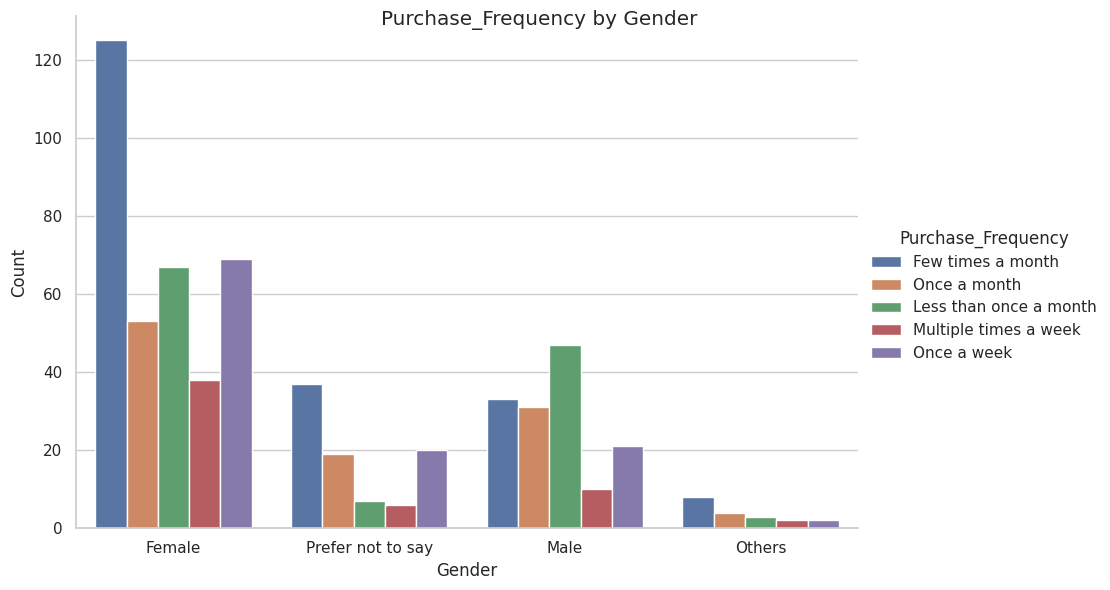

In [ ]:
plotdata('Gender', 'Purchase_Frequency')

Dapat dilihat dari gender **female** nilai paling tinggi ialah 'Few times a month' yang artinya beberapa kali dalam sebulan. Hal tersebut juga terjadi pada gender **Prefer not say** dan **other**. Ini justru berkebalikan dengan gender **Male** yang nilai modus nya adalah 'Less than once a month' atau kurang dari 1 kali tiap bulan

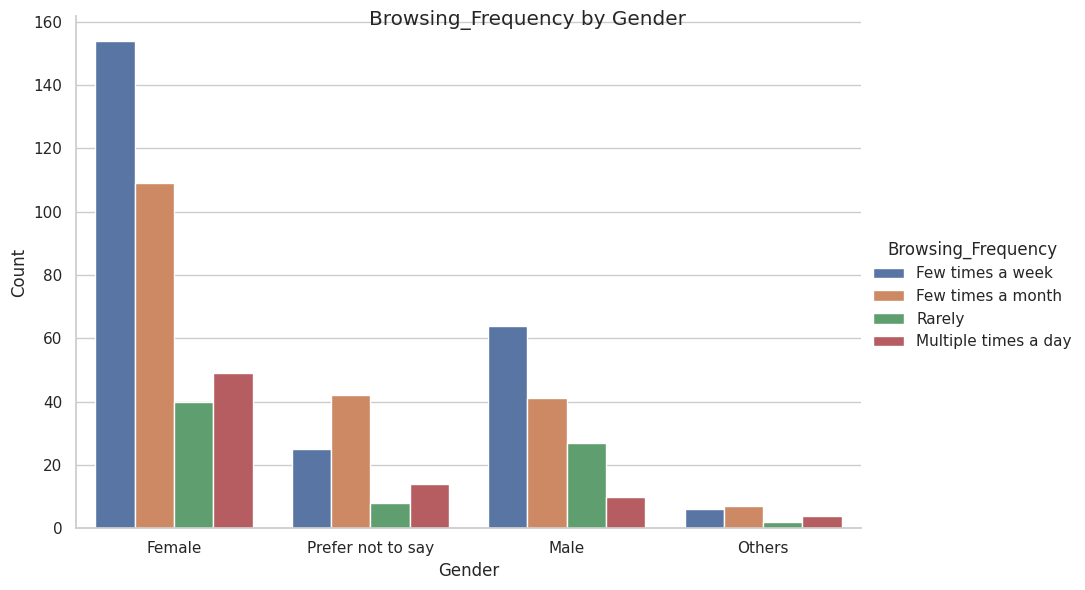

In [ ]:
plotdata('Gender', 'Browsing_Frequency')

Hal ini berkebalikan dengan 'Purchase_Frequency' diatas untuk gender **Male** dimana untuk 'Browsing_Frequency' yang dilakukan bisa beberapa kali dalam seminggu tetapi untuk pembelian atau purchase kebanyakan kurang dari 1 kali tiap bulan.

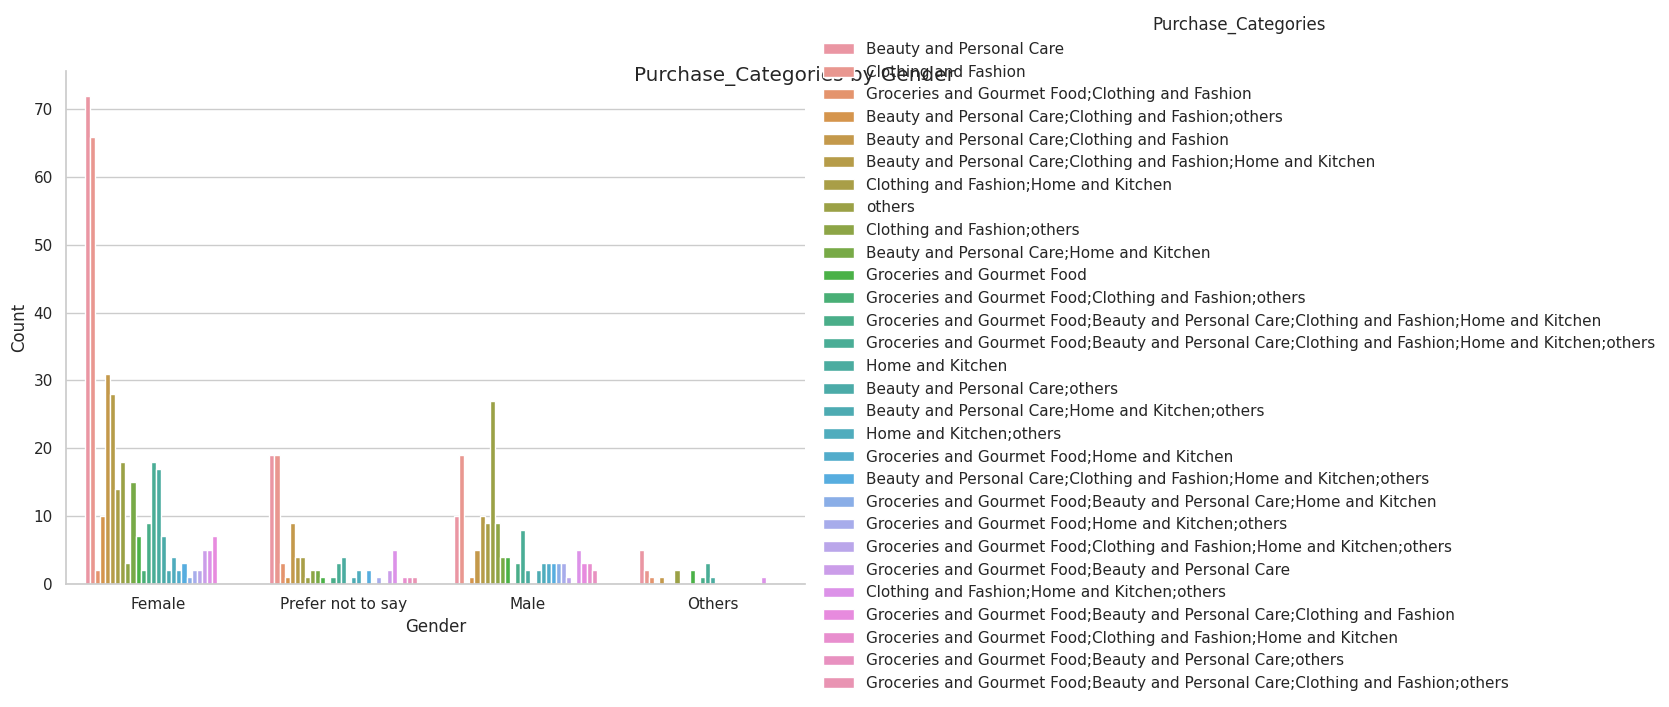

In [ ]:
plotdata('Gender', 'Purchase_Categories')

Sangat terlihat jelas kategori yang diminati oleh gender **Female** yaitu kategori Beauty and Personal Care dan Clothing and Fashion

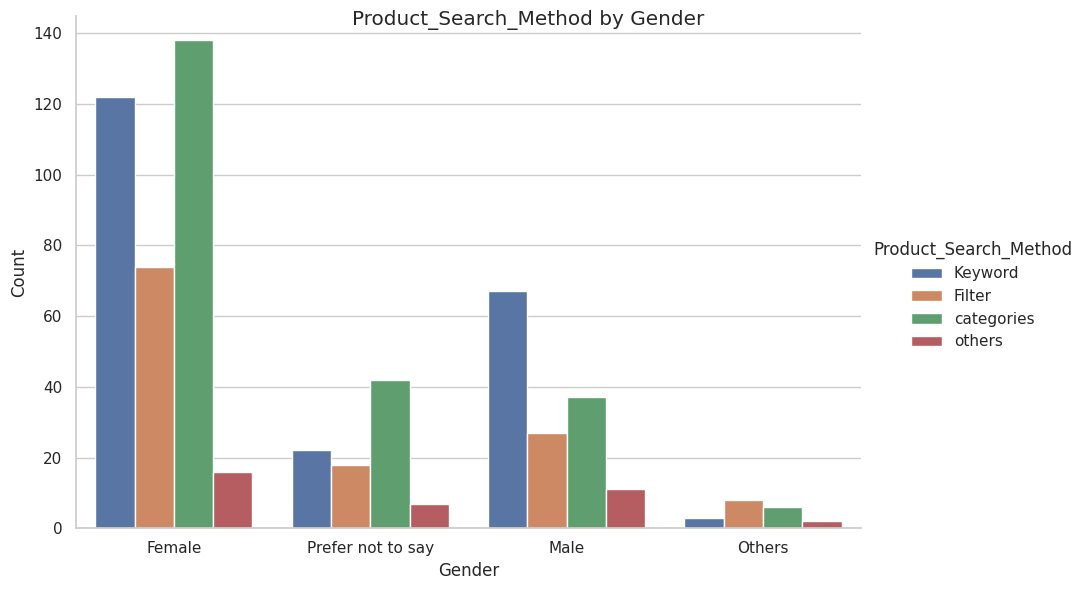

In [ ]:
plotdata('Gender', 'Product_Search_Method')

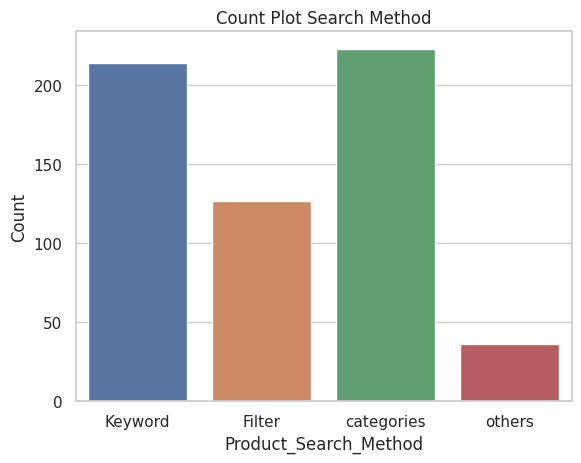

In [ ]:
# Cek Search method tanpa melihat gender
# Membuat count plot untuk satu kolom
sns.countplot(x='Product_Search_Method', data=data)

# Menambahkan label pada sumbu dan judul plot
plt.xlabel('Product_Search_Method')
plt.ylabel('Count')
plt.title('Count Plot Search Method')

# Menampilkan plot
plt.show()

Dari hasil 'Product_Search_Method' dari dikategorikan berdasar gender maupun tanpa dikategorikan gender. Metode yang paling sering digunakan adalah 'Keyword' dan 'Categories'.

# Data Preparation

## Data Cleansing

In [ ]:
# Check Missing Values
data.isna().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

Karena terdapat 2 missing values di kolom 'Product_Search_Method' maka dilakukan pengisian pada nilai kosong tersebut menggunakan modus karena kolom tersebut bernilai kategorik

In [ ]:
# Fill Missing Values
data['Product_Search_Method'] = data['Product_Search_Method'].fillna(data['Product_Search_Method'].mode()[0])

In [ ]:
# Cek kembali missing values
data.isna().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     0
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [ ]:
# Menghapus kolom yang tidak diperlukan
data.drop(columns = ['Timestamp','Personalized_Recommendation_Frequency'], inplace = True)
#Personalized_Recommendation_Frequency dihapus karena terdapat 2 kolom dan berbeda jenis data, diputuskan mengambil kolom tipe numeriknya karena lebih akurat

In [ ]:
data.columns

Index(['age', 'Gender', 'Purchase_Frequency', 'Purchase_Categories',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')

In [ ]:
data = data[data['Gender'] != 'Others']
data.shape

(583, 21)

In [ ]:
# Clipping usia Customer mulai dari 17 tahub
data['age'] = data['age'].clip(17,67)

<ipython-input-19-9d9ce4ae9e02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = data['age'].clip(17,67)


Pengambilan usia minimal 17 tahun ini dikarenakan jika mengikuti usia legal di Indonesia

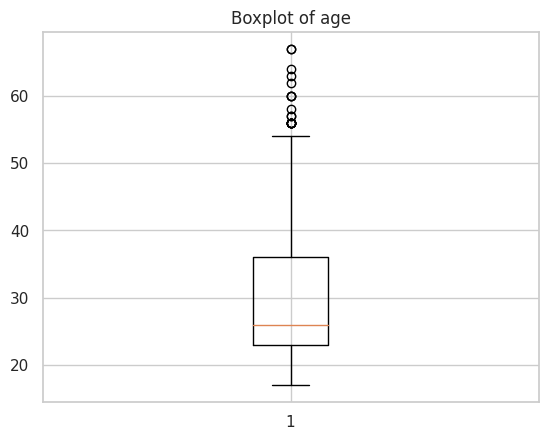

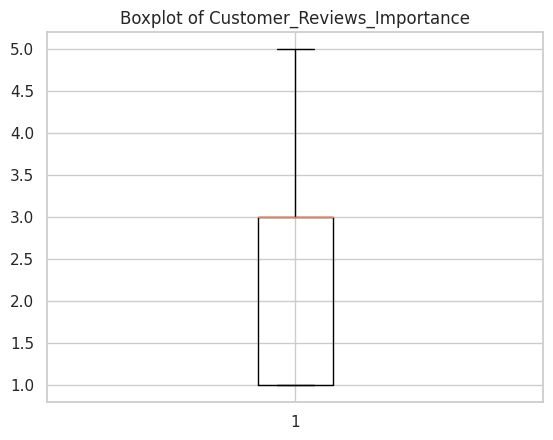

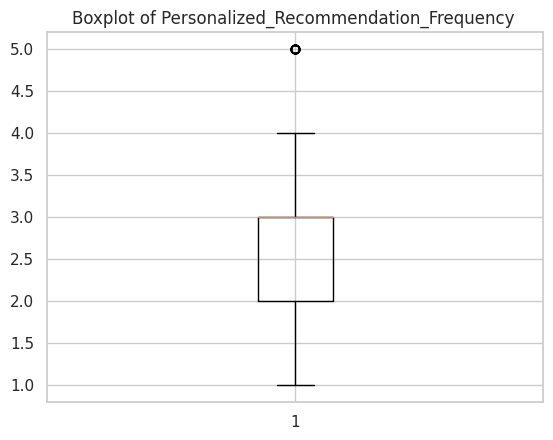

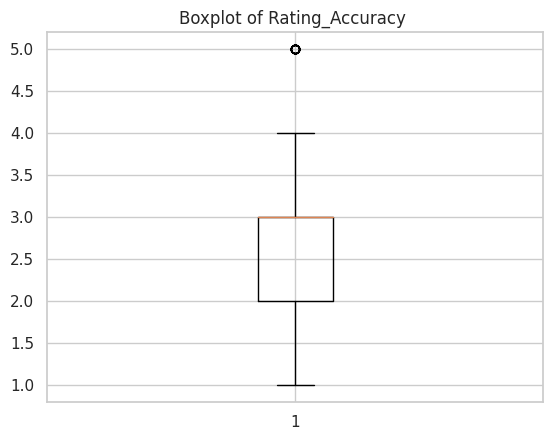

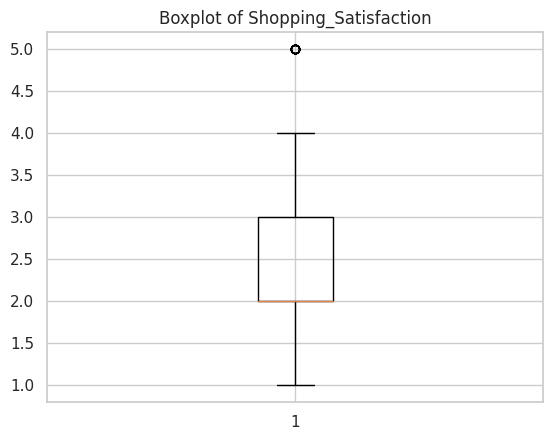

In [ ]:
# Deteksi tipe data kolom
tipe_kolom = data.dtypes

# Imputasi missing values berdasarkan tipe data
for column in data:
    if tipe_kolom[column] == 'int':
      plt.boxplot(data[column])
      plt.title(f'Boxplot of {column}')
      plt.show()



Nilai yang outliernya dihilangkan ada pada kolom **age** saja, dikarenakan untuk kolom lainnya walaupun bertipe integer namun sebenarnya rating itu adalah bertipe kategorik

In [ ]:
#Clipping menggunakan Boxplot
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
Uwishker = Q3 + 1.5 * IQR
Lwishker = Q1 + 1.5 * IQR
data['age'] = data['age'].clip(Lwishker, Uwishker)

<ipython-input-21-c601ef56631f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = data['age'].clip(Lwishker, Uwishker)


## Feature Enginering

In [ ]:
data.corr()

<ipython-input-22-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
age,1.000000,0.075862,0.024024,0.026855,0.036931
Customer_Reviews_Importance,0.075862,1.000000,0.295732,0.306171,0.391753
Personalized_Recommendation_Frequency,0.024024,0.295732,1.000000,0.422904,0.424949
Rating_Accuracy,0.026855,0.306171,0.422904,1.000000,0.501173
Shopping_Satisfaction,0.036931,0.391753,0.424949,0.501173,1.000000


Korelasi antara kolom yang bernilai numerik adalah korelasi positif, dimana yang korelasinya paling lemah adalah korelasi age atau usia

In [ ]:
data.dtypes

age                                       float64
Gender                                     object
Purchase_Frequency                         object
Purchase_Categories                        object
Browsing_Frequency                         object
Product_Search_Method                      object
Search_Result_Exploration                  object
Customer_Reviews_Importance                 int64
Add_to_Cart_Browsing                       object
Cart_Completion_Frequency                  object
Cart_Abandonment_Factors                   object
Saveforlater_Frequency                     object
Review_Left                                object
Review_Reliability                         object
Review_Helpfulness                         object
Personalized_Recommendation_Frequency       int64
Recommendation_Helpfulness                 object
Rating_Accuracy                             int64
Shopping_Satisfaction                       int64
Service_Appreciation                       object


In [ ]:
# Memisahkan antara kolom kategorik dan numerik
kolom_kategorik = data.select_dtypes(include=['object']).columns
kolom_kategorik

Index(['Gender', 'Purchase_Frequency', 'Purchase_Categories',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Add_to_Cart_Browsing',
       'Cart_Completion_Frequency', 'Cart_Abandonment_Factors',
       'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability',
       'Review_Helpfulness', 'Recommendation_Helpfulness',
       'Service_Appreciation', 'Improvement_Areas'],
      dtype='object')

In [ ]:
data.shape

(583, 21)

In [ ]:
kolom_kategorik.shape

(16,)

In [ ]:
# Mengetahui kolom numerik
kolom_numerik = data.select_dtypes(include=['int', 'float']).columns
kolom_numerik

Index(['age', 'Customer_Reviews_Importance',
       'Personalized_Recommendation_Frequency ', 'Rating_Accuracy ',
       'Shopping_Satisfaction'],
      dtype='object')

In [ ]:
data[['Customer_Reviews_Importance', 'Personalized_Recommendation_Frequency ', 'Rating_Accuracy ', 'Shopping_Satisfaction']]

,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
0,1,2,1,1
1,1,2,3,2
2,2,4,3,3
3,5,3,3,4
4,1,4,2,2
...,...,...,...,...
597,4,3,3,4
598,3,3,3,3
599,3,3,2,3
600,1,2,2,2


Kolom yang termasuk numerik adalah kolom 'age' dan 'Customer_Reviews_Importance' selain itu merupakan kategorik berjenis ordinal yang memang sudah terisi berupa angka


In [ ]:
data.rename(columns = {'Rating_Accuracy ': 'Rating_Accuracy', 'Personalized_Recommendation_Frequency ':'Personalized_Recommendation_Frequency'}, inplace=True)

<ipython-input-29-6967cf7a2cb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns = {'Rating_Accuracy ': 'Rating_Accuracy', 'Personalized_Recommendation_Frequency ':'Personalized_Recommendation_Frequency'}, inplace=True)


In [ ]:
data_kategorik = data[['Gender', 'Purchase_Frequency', 'Purchase_Categories',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Add_to_Cart_Browsing',
       'Cart_Completion_Frequency', 'Cart_Abandonment_Factors',
       'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability',
       'Review_Helpfulness', 'Recommendation_Helpfulness',
       'Service_Appreciation', 'Improvement_Areas', 'Customer_Reviews_Importance','Rating_Accuracy', 'Shopping_Satisfaction']]

In [ ]:
data_kategorik

,Gender,Purchase_Frequency,Purchase_Categories,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Recommendation_Helpfulness,Service_Appreciation,Improvement_Areas,Customer_Reviews_Importance,Rating_Accuracy,Shopping_Satisfaction
0,Female,Few times a month,Beauty and Personal Care,Few times a week,Keyword,Multiple pages,Yes,Sometimes,Found a better price elsewhere,Sometimes,Yes,Occasionally,Yes,Yes,Competitive prices,Reducing packaging waste,1,1,1
1,Female,Once a month,Clothing and Fashion,Few times a month,Keyword,Multiple pages,Yes,Often,High shipping costs,Rarely,No,Heavily,Yes,Sometimes,Wide product selection,Reducing packaging waste,1,3,2
2,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,Few times a month,Keyword,Multiple pages,Yes,Sometimes,Found a better price elsewhere,Rarely,No,Occasionally,No,No,Competitive prices,Product quality and accuracy,2,3,3
3,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Few times a month,Keyword,First page,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Heavily,Yes,Sometimes,Competitive prices,Product quality and accuracy,5,3,4
4,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Few times a month,Filter,Multiple pages,Yes,Sometimes,High shipping costs,Rarely,No,Heavily,Yes,Yes,Competitive prices,Product quality and accuracy,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,Female,Once a week,Beauty and Personal Care,Few times a week,categories,Multiple pages,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Moderately,Sometimes,Sometimes,Competitive prices,Customer service responsiveness,4,3,4
598,Female,Once a week,Clothing and Fashion,Few times a week,Filter,Multiple pages,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Heavily,Sometimes,Sometimes,Product recommendations,Reducing packaging waste,3,3,3
599,Female,Once a month,Beauty and Personal Care,Few times a week,categories,Multiple pages,Maybe,Sometimes,High shipping costs,Sometimes,Yes,Occasionally,Sometimes,Sometimes,Wide product selection,Product quality and accuracy,3,2,3
600,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Few times a month,Keyword,Multiple pages,Yes,Often,others,Sometimes,No,Heavily,Yes,Yes,Wide product selection,Product quality and accuracy,1,2,2


In [ ]:
#Membedakan antara data kategorik nominal dan ordinal
data_kategorik_ordinal = data_kategorik[['Purchase_Frequency', 'Browsing_Frequency', 'Add_to_Cart_Browsing', 'Cart_Completion_Frequency', 'Saveforlater_Frequency', 'Review_Reliability', 'Recommendation_Helpfulness', 'Customer_Reviews_Importance','Rating_Accuracy', 'Shopping_Satisfaction']]
data_kategorik_nominal = data_kategorik[[col for col in data_kategorik.columns if col not in data_kategorik_ordinal]]

In [ ]:
data_kategorik_ordinal

,Purchase_Frequency,Browsing_Frequency,Add_to_Cart_Browsing,Cart_Completion_Frequency,Saveforlater_Frequency,Review_Reliability,Recommendation_Helpfulness,Customer_Reviews_Importance,Rating_Accuracy,Shopping_Satisfaction
0,Few times a month,Few times a week,Yes,Sometimes,Sometimes,Occasionally,Yes,1,1,1
1,Once a month,Few times a month,Yes,Often,Rarely,Heavily,Sometimes,1,3,2
2,Few times a month,Few times a month,Yes,Sometimes,Rarely,Occasionally,No,2,3,3
3,Once a month,Few times a month,Maybe,Sometimes,Sometimes,Heavily,Sometimes,5,3,4
4,Less than once a month,Few times a month,Yes,Sometimes,Rarely,Heavily,Yes,1,2,2
...,...,...,...,...,...,...,...,...,...,...
597,Once a week,Few times a week,Maybe,Sometimes,Sometimes,Moderately,Sometimes,4,3,4
598,Once a week,Few times a week,Maybe,Sometimes,Sometimes,Heavily,Sometimes,3,3,3
599,Once a month,Few times a week,Maybe,Sometimes,Sometimes,Occasionally,Sometimes,3,2,3
600,Few times a month,Few times a month,Yes,Often,Sometimes,Heavily,Yes,1,2,2


In [ ]:
data_kategorik_nominal

,Gender,Purchase_Categories,Product_Search_Method,Search_Result_Exploration,Cart_Abandonment_Factors,Review_Left,Review_Helpfulness,Service_Appreciation,Improvement_Areas
0,Female,Beauty and Personal Care,Keyword,Multiple pages,Found a better price elsewhere,Yes,Yes,Competitive prices,Reducing packaging waste
1,Female,Clothing and Fashion,Keyword,Multiple pages,High shipping costs,No,Yes,Wide product selection,Reducing packaging waste
2,Prefer not to say,Groceries and Gourmet Food;Clothing and Fashion,Keyword,Multiple pages,Found a better price elsewhere,No,No,Competitive prices,Product quality and accuracy
3,Female,Beauty and Personal Care;Clothing and Fashion;...,Keyword,First page,Found a better price elsewhere,Yes,Yes,Competitive prices,Product quality and accuracy
4,Female,Beauty and Personal Care;Clothing and Fashion,Filter,Multiple pages,High shipping costs,No,Yes,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...
597,Female,Beauty and Personal Care,categories,Multiple pages,Found a better price elsewhere,Yes,Sometimes,Competitive prices,Customer service responsiveness
598,Female,Clothing and Fashion,Filter,Multiple pages,Found a better price elsewhere,Yes,Sometimes,Product recommendations,Reducing packaging waste
599,Female,Beauty and Personal Care,categories,Multiple pages,High shipping costs,Yes,Sometimes,Wide product selection,Product quality and accuracy
600,Female,Beauty and Personal Care;Clothing and Fashion;...,Keyword,Multiple pages,others,No,Yes,Wide product selection,Product quality and accuracy


In [ ]:
data_numerik = data[['age', 'Personalized_Recommendation_Frequency']]
data_numerik

,age,Personalized_Recommendation_Frequency
0,42.5,2
1,42.5,2
2,42.5,4
3,42.5,3
4,42.5,4
...,...,...
597,42.5,3
598,42.5,3
599,42.5,3
600,42.5,2


### Encoding

In [ ]:
nominal_encod = pd.get_dummies(data_kategorik_nominal)
nominal_encod

,Gender_Female,Gender_Male,Gender_Prefer not to say,Purchase_Categories_Beauty and Personal Care,Purchase_Categories_Beauty and Personal Care;Clothing and Fashion,Purchase_Categories_Beauty and Personal Care;Clothing and Fashion;Home and Kitchen,Purchase_Categories_Beauty and Personal Care;Clothing and Fashion;Home and Kitchen;others,Purchase_Categories_Beauty and Personal Care;Clothing and Fashion;others,Purchase_Categories_Beauty and Personal Care;Home and Kitchen,Purchase_Categories_Beauty and Personal Care;Home and Kitchen;others,...,Improvement_Areas_Nothing,Improvement_Areas_Product quality and accuracy,Improvement_Areas_Quality of product is very poor according to the big offers,Improvement_Areas_Reducing packaging waste,Improvement_Areas_Scrolling option would be much better than going to next page,Improvement_Areas_Shipping speed and reliability,Improvement_Areas_UI,Improvement_Areas_User interface,Improvement_Areas_User interface of app,Improvement_Areas_better app interface and lower shipping charges
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
598,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
599,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
600,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# Mapping kolom kategorik ordinal
mapping_Purchase_Frequency = {'Multiple times a week':4, 'Once a week':3, 'Few times a month':2, 'Once a month':1, 'Less than once a month':0}
mapping_Browsing_Frequency = {'Multiple times a day':3, 'Few times a week':2, 'Few times a month':1, 'Rarely':0}
mapping_Add_to_Cart_Browsing = {'Yes':2, 'Maybe':1, 'No':0}
mapping_Cart_Completion_Frequency = {'Always':4, 'Often':3, 'Sometimes':2, 'Rarely':1, 'Never':0}
mapping_Saveforlater_Frequency = {'Always':4, 'Often':3, 'Sometimes':2, 'Rarely':1, 'Never':0}
mapping_Review_Reliability = {'Heavily':4, 'Moderately':3, 'Occasionally':2, 'Rarely':1, 'Never':0}
mapping_Recommendation_Helpfulness = {'Yes':2, 'Sometimes':1, 'No':0}

#Buat dataframe kosong
ordinal_encod = pd.DataFrame()
#Mengisikan nilai mapping ke Data Frame
ordinal_encod['Purchase_Frequency'] = data_kategorik_ordinal['Purchase_Frequency'].map(mapping_Purchase_Frequency)
ordinal_encod['Browsing_Frequency'] = data_kategorik_ordinal['Browsing_Frequency'].map(mapping_Browsing_Frequency)
ordinal_encod['Add_to_Cart_Browsing'] = data_kategorik_ordinal['Add_to_Cart_Browsing'].map(mapping_Add_to_Cart_Browsing)
ordinal_encod['Cart_Completion_Frequency'] = data_kategorik_ordinal['Cart_Completion_Frequency'].map(mapping_Cart_Completion_Frequency)
ordinal_encod['Saveforlater_Frequency'] = data_kategorik_ordinal['Saveforlater_Frequency'].map(mapping_Saveforlater_Frequency)
ordinal_encod['Review_Reliability'] = data_kategorik_ordinal['Review_Reliability'].map(mapping_Review_Reliability)
ordinal_encod['Recommendation_Helpfulness'] = data_kategorik_ordinal['Recommendation_Helpfulness'].map(mapping_Recommendation_Helpfulness)
ordinal_encod['Customer_Reviews_Importance'] = data_kategorik_ordinal['Customer_Reviews_Importance']
ordinal_encod['Rating_Accuracy'] = data_kategorik_ordinal['Rating_Accuracy']
ordinal_encod['Shopping_Satisfaction'] = data_kategorik_ordinal['Shopping_Satisfaction']

In [ ]:
ordinal_encod

,Purchase_Frequency,Browsing_Frequency,Add_to_Cart_Browsing,Cart_Completion_Frequency,Saveforlater_Frequency,Review_Reliability,Recommendation_Helpfulness,Customer_Reviews_Importance,Rating_Accuracy,Shopping_Satisfaction
0,2,2,2,2,2,2,2,1,1,1
1,1,1,2,3,1,4,1,1,3,2
2,2,1,2,2,1,2,0,2,3,3
3,1,1,1,2,2,4,1,5,3,4
4,0,1,2,2,1,4,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...
597,3,2,1,2,2,3,1,4,3,4
598,3,2,1,2,2,4,1,3,3,3
599,1,2,1,2,2,2,1,3,2,3
600,2,1,2,3,2,4,2,1,2,2


Pada encoding kategorikal ordinal diatas menggunakan mapping secara manual dan tidak menggunakan label encoder. Mengapa? Karena label encoder akan memberikan nilai berdasarkan alfanumerik sehingga pembobotannya akan menjadi kacau dan tidak sesuai dengan yang seharusnya, oleh karena itu dilakukan mapping manual untuk menjaga kualitas data sebelum masuk ke pemodelan

In [ ]:
merge_kategorikal = pd.concat([nominal_encod, ordinal_encod], axis = 1)
merge_kategorikal

,Gender_Female,Gender_Male,Gender_Prefer not to say,Purchase_Categories_Beauty and Personal Care,Purchase_Categories_Beauty and Personal Care;Clothing and Fashion,Purchase_Categories_Beauty and Personal Care;Clothing and Fashion;Home and Kitchen,Purchase_Categories_Beauty and Personal Care;Clothing and Fashion;Home and Kitchen;others,Purchase_Categories_Beauty and Personal Care;Clothing and Fashion;others,Purchase_Categories_Beauty and Personal Care;Home and Kitchen,Purchase_Categories_Beauty and Personal Care;Home and Kitchen;others,...,Purchase_Frequency,Browsing_Frequency,Add_to_Cart_Browsing,Cart_Completion_Frequency,Saveforlater_Frequency,Review_Reliability,Recommendation_Helpfulness,Customer_Reviews_Importance,Rating_Accuracy,Shopping_Satisfaction
0,1,0,0,1,0,0,0,0,0,0,...,2,2,2,2,2,2,2,1,1,1
1,1,0,0,0,0,0,0,0,0,0,...,1,1,2,3,1,4,1,1,3,2
2,0,0,1,0,0,0,0,0,0,0,...,2,1,2,2,1,2,0,2,3,3
3,1,0,0,0,0,0,0,1,0,0,...,1,1,1,2,2,4,1,5,3,4
4,1,0,0,0,1,0,0,0,0,0,...,0,1,2,2,1,4,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,1,0,0,1,0,0,0,0,0,0,...,3,2,1,2,2,3,1,4,3,4
598,1,0,0,0,0,0,0,0,0,0,...,3,2,1,2,2,4,1,3,3,3
599,1,0,0,1,0,0,0,0,0,0,...,1,2,1,2,2,2,1,3,2,3
600,1,0,0,0,0,0,0,1,0,0,...,2,1,2,3,2,4,2,1,2,2


In [ ]:
data_final = pd.concat([merge_kategorikal, data_numerik], axis = 1)
data_final

,Gender_Female,Gender_Male,Gender_Prefer not to say,Purchase_Categories_Beauty and Personal Care,Purchase_Categories_Beauty and Personal Care;Clothing and Fashion,Purchase_Categories_Beauty and Personal Care;Clothing and Fashion;Home and Kitchen,Purchase_Categories_Beauty and Personal Care;Clothing and Fashion;Home and Kitchen;others,Purchase_Categories_Beauty and Personal Care;Clothing and Fashion;others,Purchase_Categories_Beauty and Personal Care;Home and Kitchen,Purchase_Categories_Beauty and Personal Care;Home and Kitchen;others,...,Add_to_Cart_Browsing,Cart_Completion_Frequency,Saveforlater_Frequency,Review_Reliability,Recommendation_Helpfulness,Customer_Reviews_Importance,Rating_Accuracy,Shopping_Satisfaction,age,Personalized_Recommendation_Frequency
0,1,0,0,1,0,0,0,0,0,0,...,2,2,2,2,2,1,1,1,42.5,2
1,1,0,0,0,0,0,0,0,0,0,...,2,3,1,4,1,1,3,2,42.5,2
2,0,0,1,0,0,0,0,0,0,0,...,2,2,1,2,0,2,3,3,42.5,4
3,1,0,0,0,0,0,0,1,0,0,...,1,2,2,4,1,5,3,4,42.5,3
4,1,0,0,0,1,0,0,0,0,0,...,2,2,1,4,2,1,2,2,42.5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,1,0,0,1,0,0,0,0,0,0,...,1,2,2,3,1,4,3,4,42.5,3
598,1,0,0,0,0,0,0,0,0,0,...,1,2,2,4,1,3,3,3,42.5,3
599,1,0,0,1,0,0,0,0,0,0,...,1,2,2,2,1,3,2,3,42.5,3
600,1,0,0,0,0,0,0,1,0,0,...,2,3,2,4,2,1,2,2,42.5,2


# Data Modelling

In [ ]:
!pip install kmodes

In [ ]:
from kmodes.kprototypes import KPrototypes

Koefisien Silhouette Terbaik: 0.0629802241745307
n cluster terbaik: 2


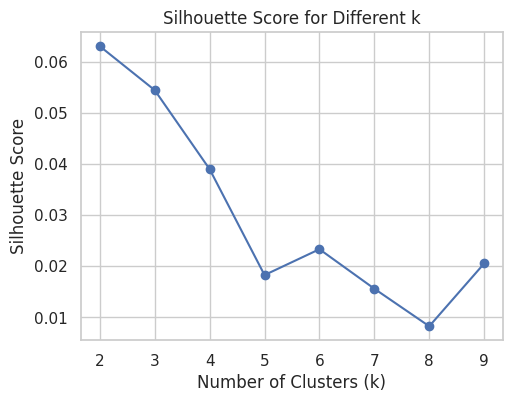

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores=[]
for k in range(2, 10):
  kproto = KPrototypes(n_clusters = k, random_state = 75)
  clusters = kproto.fit_predict(data_final, categorical=list(range(0,85)))
  silhouette_avg = silhouette_score(data_final, clusters)
  silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

# Mencari nilai Silhouette Coefficient terbaik dan jumlah klaster yang sesuai
best_score = np.max(silhouette_scores)
best_k = range(2, 10)[np.argmax(silhouette_scores)]

print(f"Koefisien Silhouette Terbaik: {best_score}")
print(f"n cluster terbaik: {best_k}")

In [ ]:
# Karena K terbaik adalah 2 maka model menggunakan 2 cluster
model_kprototypes = KPrototypes(n_clusters = 2, random_state = 75)
model_final = model_kprototypes.fit_predict(data_final, categorical=list(range(0,85)))

In [ ]:
data_final['cluster'] = model_final

In [ ]:
data_final

,Gender_Female,Gender_Male,Gender_Prefer not to say,Purchase_Categories_Beauty and Personal Care,Purchase_Categories_Beauty and Personal Care;Clothing and Fashion,Purchase_Categories_Beauty and Personal Care;Clothing and Fashion;Home and Kitchen,Purchase_Categories_Beauty and Personal Care;Clothing and Fashion;Home and Kitchen;others,Purchase_Categories_Beauty and Personal Care;Clothing and Fashion;others,Purchase_Categories_Beauty and Personal Care;Home and Kitchen,Purchase_Categories_Beauty and Personal Care;Home and Kitchen;others,...,Cart_Completion_Frequency,Saveforlater_Frequency,Review_Reliability,Recommendation_Helpfulness,Customer_Reviews_Importance,Rating_Accuracy,Shopping_Satisfaction,age,Personalized_Recommendation_Frequency,cluster
0,1,0,0,1,0,0,0,0,0,0,...,2,2,2,2,1,1,1,42.5,2,1
1,1,0,0,0,0,0,0,0,0,0,...,3,1,4,1,1,3,2,42.5,2,1
2,0,0,1,0,0,0,0,0,0,0,...,2,1,2,0,2,3,3,42.5,4,0
3,1,0,0,0,0,0,0,1,0,0,...,2,2,4,1,5,3,4,42.5,3,0
4,1,0,0,0,1,0,0,0,0,0,...,2,1,4,2,1,2,2,42.5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,1,0,0,1,0,0,0,0,0,0,...,2,2,3,1,4,3,4,42.5,3,0
598,1,0,0,0,0,0,0,0,0,0,...,2,2,4,1,3,3,3,42.5,3,0
599,1,0,0,1,0,0,0,0,0,0,...,2,2,2,1,3,2,3,42.5,3,0
600,1,0,0,0,0,0,0,1,0,0,...,3,2,4,2,1,2,2,42.5,2,1


In [ ]:
data_final['cluster'].unique()

array([1, 0], dtype=uint16)

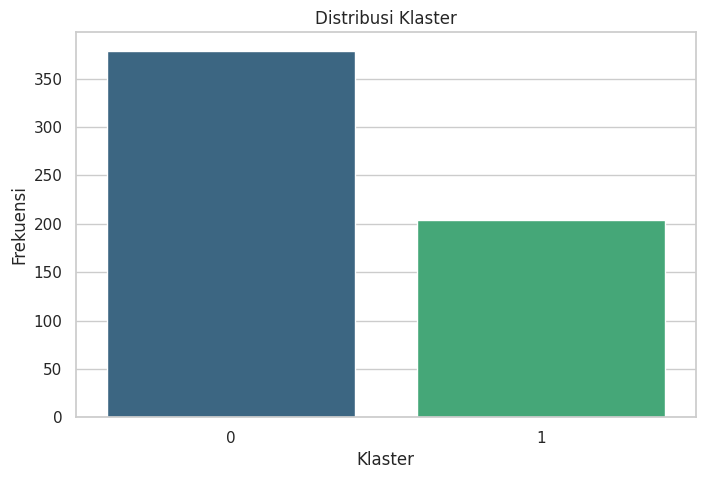

In [ ]:
cluster_counts = data_final['cluster'].value_counts()

# Membuat bar plot menggunakan Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.title('Distribusi Klaster')
plt.xlabel('Klaster')
plt.ylabel('Frekuensi')
plt.show()

Hasil dari cluster 0 dan 1 ini bisa dimaknai banyak arti. Disini saya mendifinisikan 0 = bukan pelanggan tetap dan 1 = pelanggan tetap